In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# Load the dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df = pd.read_csv('Launches.csv')

# Define features and target variable
X = df[['Rocket Price']]
y = df['Launch Status']

df

,Launch Id,Launch Time,Launch Status,Launch Suborbital,Rocket Name,Rocket Organisation,Rocket Price,Rocket Payload to LEO,Location,Launch Year,Launch Year Mon,USD/kg to LEO,2021 Mult,USD/kg to LEO CPI Adjusted,Rocket Price CPI Adjusted,Dum
0,3,2018-05-22 19:47:00+00:00,Success,Orbital,Falcon 9 Block 4,SpaceX,62.00,22800.0,"SLC-4E, Vandenberg SFB, California, USA",2018,2018-05,27192.982456,1.079102,29343.994616,66.904308,1
1,4,2018-06-04 04:45:00+00:00,Success,Orbital,Falcon 9 Block 4,SpaceX,62.00,22800.0,"SLC-40, Cape Canaveral SFS, Florida, USA",2018,2018-06,27192.982456,1.079102,29343.994616,66.904308,1
2,5,2018-02-06 20:45:00+00:00,Success,Orbital,Falcon Heavy,SpaceX,90.00,63800.0,"LC-39A, Kennedy Space Center, Florida, USA",2018,2018-02,14106.583072,1.079102,15222.438303,97.119156,1
3,6,2018-06-29 09:42:00+00:00,Success,Orbital,Falcon 9 Block 4,SpaceX,62.00,22800.0,"SLC-40, Cape Canaveral SFS, Florida, USA",2018,2018-06,27192.982456,1.079102,29343.994616,66.904308,1
4,7,2018-04-18 22:51:00+00:00,Success,Orbital,Falcon 9 Block 4,SpaceX,62.00,22800.0,"SLC-40, Cape Canaveral SFS, Florida, USA",2018,2018-04,27192.982456,1.079102,29343.994616,66.904308,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6163,6876,2021-12-15 02:00:00+00:00,Failure,Orbital,Kuaizhou 1A,ExPace,5.80,300.0,"Site 95, Jiuquan Satellite Launch Center, China",2021,2021-12,193333.333333,1.000000,193333.333333,5.800000,1
6164,6878,2021-12-26 03:11:00+00:00,Success,Orbital,Long March 4C,CASC,64.68,4200.0,"LC-9, Taiyuan Satellite Launch Center, China",2021,2021-12,154000.000000,1.000000,154000.000000,64.680000,1
6165,6882,2021-12-29 16:43:00+00:00,Success,Orbital,Long March 3B/E,CASC,29.15,11500.0,"LC-2, Xichang Satellite Launch Center, China",2021,2021-12,25347.826087,1.000000,25347.826087,29.150000,1
6166,6886,2021-12-30 03:30:00+00:00,Failure,Orbital,Simorgh,Iranian Space Agency,NaN,350.0,"Imam Khomeini Spaceport, Semnan Space Center, ...",2021,2021-12,NaN,1.000000,NaN,NaN,1


<AxesSubplot:xlabel='Launch Status', ylabel='Count'>

<Figure size 1000x600 with 0 Axes>

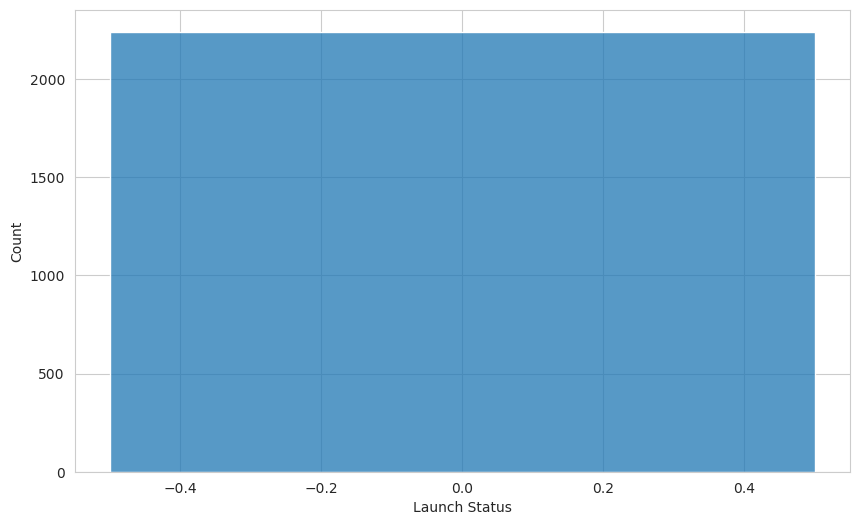

In [111]:
plt.figure(figsize=(10, 6))
count_success = df['Launch Status']

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Launch Status')

In [115]:
%pip install imblearn
from imblearn.over_sampling import SMOTE

df['Launch Status'] = df['Launch Status'].apply(lambda x: 1 if x == 'Success' else 0)
df.dropna(inplace=True)

print(df['Launch Status'].value_counts() ==)

Launch Status
0    2240
Name: count, dtype: int64


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy: 0.9524647887323944


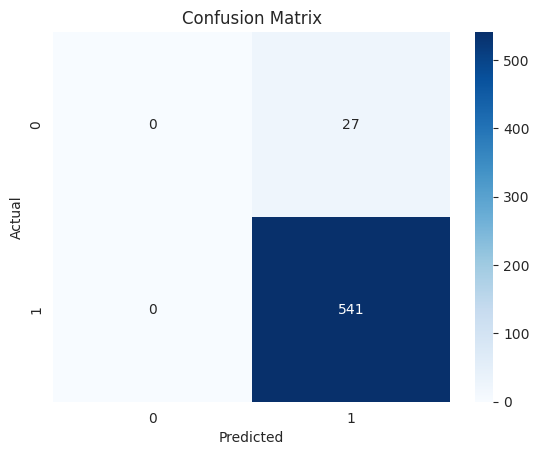

In [60]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

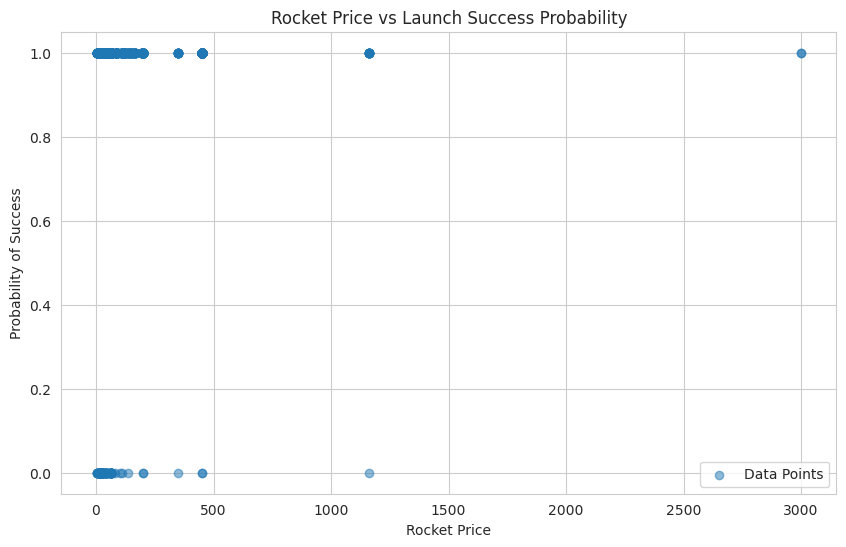

In [64]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')
plt.xlabel('Rocket Price')
plt.ylabel('Probability of Success')
plt.title('Rocket Price vs Launch Success Probability')
plt.legend()
plt.show()